### MNIST with CNN<br/>
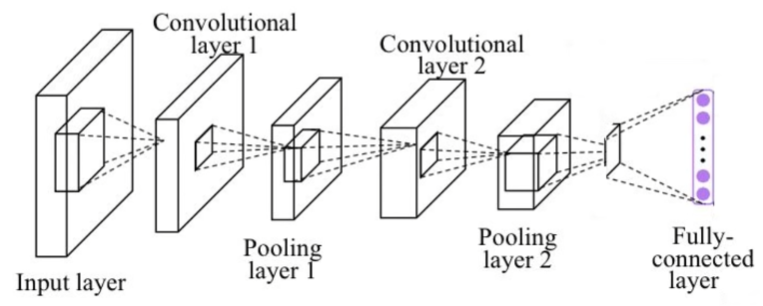

In [1]:
# Lab 11 MNIST and Convolutional Neural Network
import numpy as np
import tensorflow as tf
import random

mnist = tf.keras.datasets.mnist

# input layer(image)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255 # 데이터가 0에서 255의 값을 가지므로 0~1상 값으로 정규화
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # CNN에서 사용하기 위해 이미지 데이터를 (이미지 개수, 28,28,1) 형태로 변환
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# one hot encode y data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# hyper parameters
learning_rate = 0.001
training_epochs = 12
batch_size = 128

tf.model = tf.keras.Sequential()
# L1
# Convolutional Layer (Filter/Kernel): filter 16개 사용, 필터크기 3x3, 입력 이미지 형태 (28,28,1), 활성화 함수 RELU
tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
# pooling layer: maxpooling, 필터크기 2x2로 pooling
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten()) # 이전 layer의 2D 출력을 1D 벡터로 평탄화
tf.model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax')) # 10개의 풀력 유닛을 가지는 완전 연결 레이어, 10개 클래스 중 하나에 해당하는 확률 출력

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8